In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 生成序列X ,在-1到6直接产生140个点
plot_x = np.linspace(-1,6,141)
# plot_x

In [3]:
# 生成序列Y， 二次函数
plot_y = (plot_x-2.5)**2 - 1

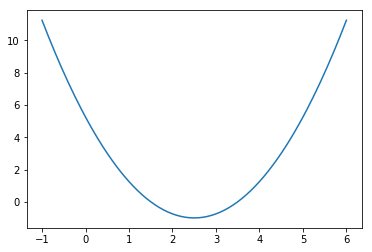

In [4]:
# 绘制二次函数图像
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# 定义损失函数，计算损失函数的梯度
def DJ(theta):
    '''
    首先定义损失函数，其次计算损失函数的梯度。
    :param theta: 待估计参数，这里指自变量X
    :return: 指定参数，对应的梯度
    '''
    # 写出损失函数
    # f(x) = y = (x-2.5)**2 -1
    # 计算损失函数的梯度
    grad_f = 2 * (theta - 2.5)
    return grad_f

In [6]:
# 计算theta对应的损失函数值
def J(theta):
    '''
    计算theta对应的损失函数值
    :param theta: 待估计参数，这里指自变量X
    :return: 指定参数，对应的损失函数值
    '''
    f_theta = (theta - 2.5) ** 2 - 1
    return f_theta

In [7]:
# 定义相关的参数
eta = 0.2        # 定义学习率
epsilon = 1e-8   # 定义误差变动最小值
theta = 0.0      # 定义参数的初始值（这里指X的初始值）

In [8]:
# 实现梯度下降法，
# 首先计算初始参数theta的梯度，然后以学习率eta，沿着梯度反方向修正参数
# 如果最后一个theta对应的误差函数值与上一个参数对应的误差函数值变动极小，则终止循环。
while True:
    gradient = DJ(theta= theta)
    last_theta = theta
    theta = theta - eta * gradient

    if(abs(J(theta= theta) - J(theta= last_theta)) < epsilon):
        break

In [9]:
# 打印参数以及损失函数值
print('参数theta：%s' %(theta) )
print('损失函数值：%s' %(J(theta= theta)) )

参数theta：2.499945157623399
损失函数值：-0.9999999969923137


In [10]:
# ############################
# 记录梯度下降的过程，即参数值theta
theta = 0.0
theta_history = [theta]
while True:
    gradient = DJ(theta= theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)

    if(abs(J(theta= theta) - J(theta= last_theta)) < epsilon):
        break

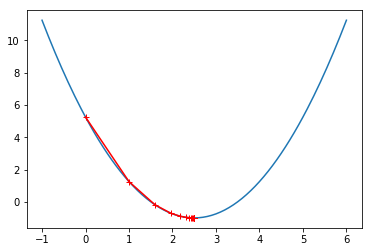

In [11]:
# 绘制梯度下降的过程图像
plt.plot(plot_x, J(theta= plot_x))
plt.plot(np.array(theta_history),
         J(theta=np.array(theta_history)),
         color= 'red', marker='+')
plt.show()

In [12]:
# ############################
# 梯度下降法，代码封装
def grad_desc(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history = [initial_theta]
    
    # 定义损失函数，计算损失函数的梯度
    def DJ(theta):
        grad_f = 2 * (theta - 2.5)
        return grad_f
    
    # 计算theta对应的损失函数值
    def J(theta):
        f_theta = (theta - 2.5) ** 2 - 1
        return f_theta
    
    # 实现梯度下降法
    while True:
        gradient = DJ(theta= theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta= theta) - J(theta= last_theta)) < epsilon):
            break
            
    return {'theta':theta,'theta_history':theta_history}

In [13]:
# 绘制梯度下降的过程图像
def plot_theta_history(plot_x = plot_x,theta_history = theta_history):
    plt.plot(plot_x, J(theta = plot_x))
    plt.plot(np.array(theta_history),
             J(theta = np.array(theta_history)),
             color = 'red', marker='+')
    plt.show()

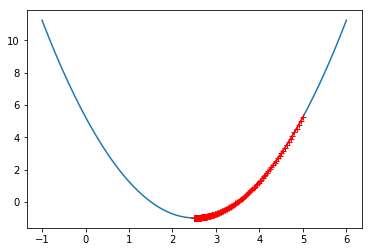

In [14]:
result = grad_desc(initial_theta = 5.0, eta=0.01)
plot_theta_history(plot_x, result['theta_history'])

In [15]:
# ############################
# 梯度下降法，代码封装优化
# 优化问题：如果学习率过大，会报错toolager，进行判断，如果过大，返回inf
# 新增加参数： 最大迭代次数
def grad_desc(initial_theta, eta,n_iters= 1000, epsilon=1e-8):
    theta = initial_theta
    theta_history = [initial_theta]
    n_iters = n_iters
    i_iters = 0
    
    # 定义损失函数，计算损失函数的梯度
    def DJ(theta):
        grad_f = 2 * (theta - 2.5)
        return grad_f
    
    # 计算theta对应的损失函数值
    def J(theta):
        # 如果学习率过大，会报错toolager，进行判断，如果过大，返回inf
        try:
            f_theta = (theta - 2.5) ** 2 - 1
            return f_theta
        except:
            return float('inf')
    
    # 实现梯度下降法
    while i_iters < n_iters:
        gradient = DJ(theta= theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta= theta) - J(theta= last_theta)) < epsilon):
            break
        i_iters += 1
            
    return {'theta':theta,'theta_history':theta_history}

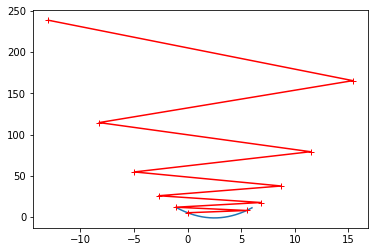

In [16]:
result = grad_desc(initial_theta = 0.0, eta=1.1,n_iters= 10)
plot_theta_history(plot_x, result['theta_history'])